In [1]:
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def blob_detection(mask_path):
    mask = cv2.imread(mask_path, 0)
   #: 念のためもう一度二値化
    _, mask = cv2.threshold(mask, 150, 255, cv2.THRESH_BINARY)

    label = cv2.connectedComponentsWithStats(mask)
    data = copy.deepcopy(label[1])

    labels = []
    for label in np.unique(data):
        #: ラベル0は背景
        if label == 0:
            continue
        else:
            labels.append(label)

    mask = np.zeros((mask.shape)+(len(labels),), dtype=np.uint8)

    for n, label in enumerate(labels):
        mask[:, :, n] = np.uint8(data == label)

    cls_idxs = np.ones([mask.shape[-1]], dtype=np.int32)

    return mask, cls_idxs

In [3]:
mask_path = './datasets/train/hand_made_mask/IMG_0721.png'
mask, cls_idx = blob_detection(mask_path)

In [4]:
mask.shape

(3024, 4032, 44)

In [5]:
cls_idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
def visualize_mask(mask_path):
    gray_src = cv2.imread(mask_path, 0)
    # ラベリング結果書き出し用に二値画像をカラー変換
    color_src = cv2.cvtColor(gray_src, cv2.COLOR_GRAY2RGB)

    # ラベリング処理: label[nLabels, labelImages, data, center]
    label = cv2.connectedComponentsWithStats(gray_src)

    # オブジェクト情報を項目別に抽出
    n = label[0] - 1                    # ラベル数(0:背景を含む)
    data = np.delete(label[2], 0, 0)    # [外接矩形の左上x, y, w, h, s:面積]
    center = np.delete(label[3], 0, 0)  # [重心座標x, y]

    font = cv2.FONT_HERSHEY_PLAIN

    for i in range(n):

        # 各オブジェクトの外接矩形を赤枠で表示
        x0 = data[i][0]
        y0 = data[i][1]
        x1 = data[i][0] + data[i][2]
        y1 = data[i][1] + data[i][3]
        cv2.rectangle(color_src, (x0, y0), (x1, y1), (255, 0, 0), 3)

        c_x = int(center[i][0])
        c_y = int(center[i][1])

        s = data[i][4]

        # 各オブジェクトのラベル番号と面積に黄文字で表示
        cv2.putText(color_src, 'ID:' + str(i + 1), (c_x-100, c_y+20), font, 6, (255, 102, 0), 6, cv2.LINE_AA)
        cv2.putText(color_src, 'S:' + str(s), (c_x-100, c_y+80), font, 3, (0, 0, 255), 3, cv2.LINE_AA)

    # 結果の表示
    plt.figure(figsize=(36, 12))
    plt.imshow(color_src)

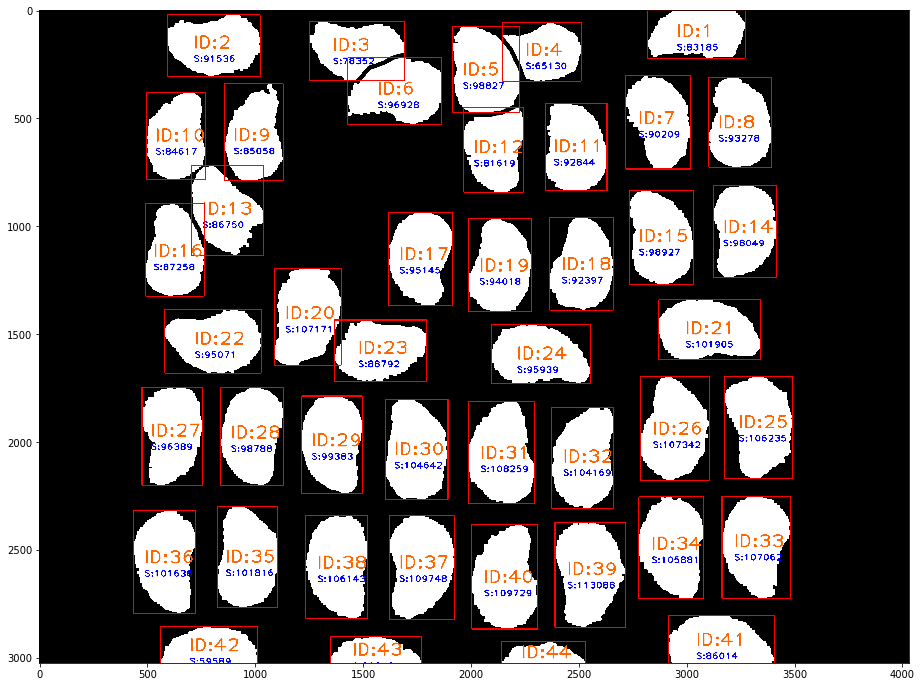

In [52]:
visualize_mask(mask_path)